In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pptoolbox.platform import preprocess, WAVELENGTHS_3NM_V1
from pptoolbox.preprocessing import SNV, MSC, SavitzkyGolay, Detrend

from pptoolbox.visualization import initialize_theme
cmaps = initialize_theme()

Registered profileprint_light_cmap
Registered profileprint_diverging_cmap


# import and preprocess

In [2]:
label_df = pd.read_csv(f'../data/raw/ketchup_label.csv')

In [3]:
label_df.head()

,lot_name,Brand,Label,Price (SGD),Weight (kg),price per weight,Made in,Energy (kcal),Fat (g),carbohydrates (g),sugar (g),protein (g),salt (mg),Expiry,Days to Expiry,Months\n(rd down),Avg front,avg rear,avg mid
0,K_1,Hellmann’s,Tomato Ketchup Gluten Free,16.24,0.40,40.60,USA,86,0.5,19.0,18.0,1.3,1800,28-Feb-25,172,5,11.000000,9.833333,10.416667
1,K_2,Rudolf’s,Bio Ketchup,8.49,0.53,16.02,Latvia,90,0.1,19.5,13.9,1.6,1700,5-Sep-26,726,23,10.333333,9.666667,10.000000
2,K_3,Farmland,Tomato Ketchup,1.30,0.34,3.82,Malaysia,128,1.9,26.3,26.3,1.5,796,19-Sep-25,375,12,13.500000,12.500000,13.000000
3,K_4,Supervalu,Tomato Ketchup 50% less sugar and salt,2.28,0.45,5.12,Ireland,61,0.5,13.0,10.0,1.4,700,4-Oct-24,25,0,17.500000,16.500000,17.000000
4,K_5,Hunt’s,100% all natural tomato ketchup,4.50,0.57,7.94,USA,118,0.0,29.4,17.6,0.0,882,3-Apr-25,206,6,5.333333,4.833333,5.083333


In [4]:
label_df.value_counts('Made in').sort_index()

Made in
Ireland      1
Italy        1
Japan        3
Korea        2
Latvia       1
Malaysia     4
Mexico       1
Singapore    2
USA          5
dtype: int64

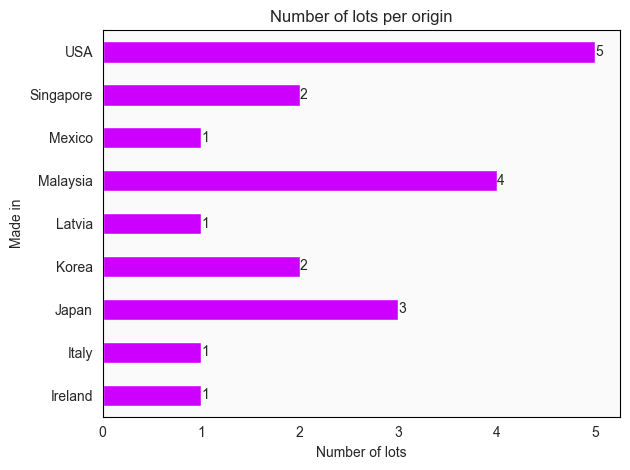

In [5]:
ax = label_df.value_counts('Made in').sort_index().plot(kind='barh')
ax.set_xlabel('Number of lots')
ax.bar_label(ax.containers[0])
ax.title.set_text('Number of lots per origin')

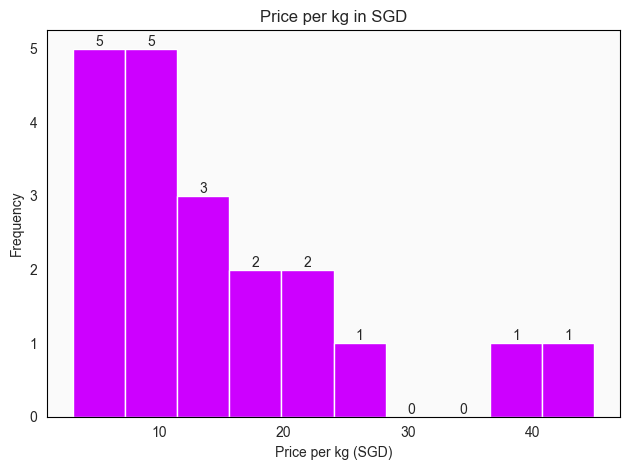

In [6]:
ax = label_df['price per weight'].plot(kind='hist')
ax.set_xlabel('Price per kg (SGD)')
ax.bar_label(ax.containers[0])
ax.title.set_text('Price per kg in SGD')

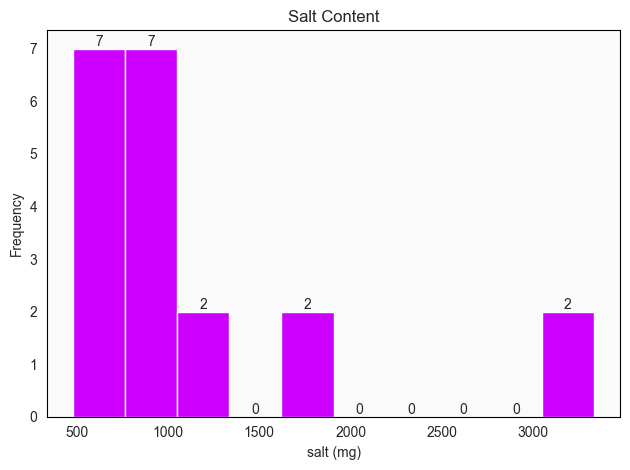

In [7]:
ax = label_df['salt (mg)'].plot(kind='hist')
ax.set_xlabel('salt (mg)')
ax.bar_label(ax.containers[0])
ax.title.set_text('Salt Content')

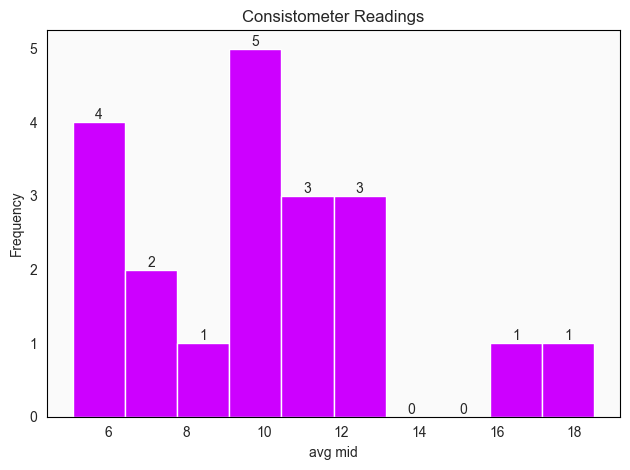

In [8]:
ax = label_df['avg mid'].plot(kind='hist')
ax.set_xlabel('avg mid')
ax.bar_label(ax.containers[0])
ax.title.set_text('Consistometer Readings')